In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pathlib

In [ ]:

data_dir = pathlib.Path("data/101_ObjectCategories") 
img_size = (224, 224)   
batch_size = 32
seed = 42
train_val_split = 0.2

#Datasets
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=train_val_split,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=train_val_split,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)


In [3]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("num train_ds shape: ", train_ds.element_spec)
print("num val_ds shape: ", val_ds.element_spec)
print("Classes:", class_names)
print("num_classes:", num_classes)


num train_ds shape:  (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
num val_ds shape:  (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Classes: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 

In [4]:
def build_model(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model



In [5]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

model = build_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss,
    metrics=metrics,
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809,830 (98.46 MB)

 Trainable params: 25,809,830 (98.46 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20


2025-09-03 23:44:22.809933: I external/local_xla/xla/service/service.cc:163] XLA service 0x7d726800efd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-03 23:44:22.809951: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-09-03 23:44:22.839493: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-03 23:44:23.008049: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-09-03 23:44:23.137176: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-03 23:44:23.137211: I e

  7/229 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0180 - loss: 5.0971   

I0000 00:00:1756968270.505962   20355 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


227/229 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1760 - loss: 4.0602

2025-09-03 23:44:36.558298: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-03 23:44:36.558320: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-03 23:44:37.114642: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_999', 12 bytes spill stores, 12 bytes spill loads

2025-09-03 23:44:37.289109: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : 

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1766 - loss: 4.0568

2025-09-03 23:44:41.976376: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-03 23:44:42.745063: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_100', 32 bytes spill stores, 32 bytes spill loads

2025-09-03 23:44:42.999921: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_100', 324 bytes spill stores, 324 bytes spill loads



229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.2514 - loss: 3.6699 - val_accuracy: 0.3638 - val_loss: 3.0194
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3890 - loss: 2.8149 - val_accuracy: 0.4579 - val_loss: 2.5433
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4738 - loss: 2.2732 - val_accuracy: 0.4934 - val_loss: 2.2907
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5651 - loss: 1.7842 - val_accuracy: 0.5230 - val_loss: 2.1000
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6407 - loss: 1.4065 - val_accuracy: 0.5268 - val_loss: 2.1458
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7143 - loss: 1.0640 - val_accuracy: 0.5531 - val_loss: 2.0794
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7605 - loss: 0.8689 - val_accuracy: 0.5569 - val_loss: 2.1911
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7954 - loss: 0.7003 - val_accuracy: 0.53

In [7]:

def graph_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot accuracy on left y-axis
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy", color="tab:blue")
    ax1.plot(epochs, acc, label="Train Acc", color="tab:blue", linestyle="--")
    ax1.plot(epochs, val_acc, label="Val Acc", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Add second y-axis for loss
    ax2 = ax1.twinx()
    ax2.set_ylabel("Loss", color="tab:red")
    ax2.plot(epochs, loss, label="Train Loss", color="tab:red", linestyle="--")
    ax2.plot(epochs, val_loss, label="Val Loss", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title + legends
    fig.suptitle("Training History: Accuracy & Loss")
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.grid(True)
    plt.show()

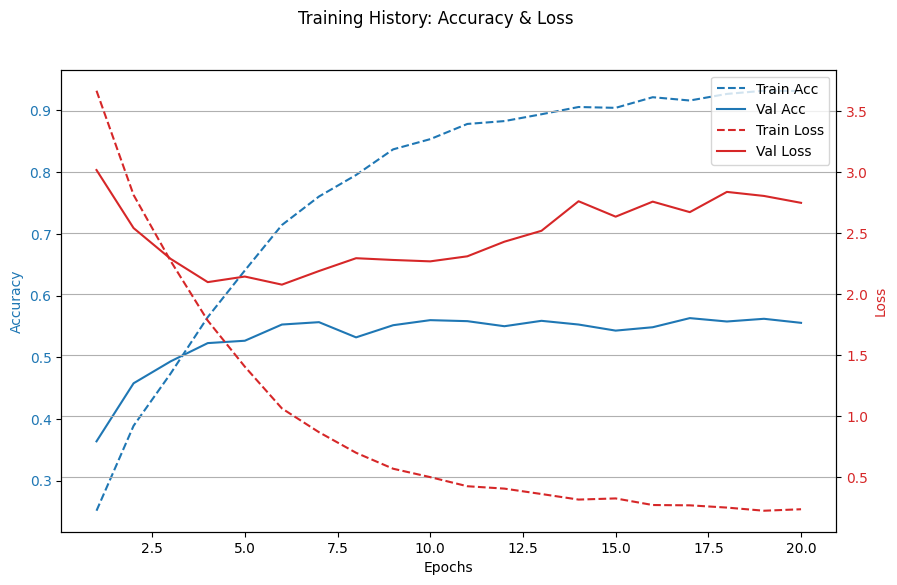

In [8]:
graph_history(history)

* This is serverly overfitting. I am going to add more Dropout layers and batch normalization to every hidden layers.

In [9]:
def build_model2(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model



Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.1717 - loss: 4.1106 - val_accuracy: 0.3025 - val_loss: 3.4007 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3044 - loss: 3.3034 - val_accuracy: 0.3676 - val_loss: 3.0137 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3630 - loss: 2.9354 - val_accuracy: 0.4092 - val_loss: 2.7968 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3983 - loss: 2.6779 - val_accuracy: 0.4360 - val_loss: 2.6266 - learning_rate: 0.0010
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4285 - loss: 2.4589 - val_accuracy: 0.4568 - val_loss: 2.4569 - learning_rate: 0.0010
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4677 - loss: 2.2290 - val_accuracy: 0.4661 - val_loss: 2.3512 - learning_rate: 0.0010
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4989 - loss: 2

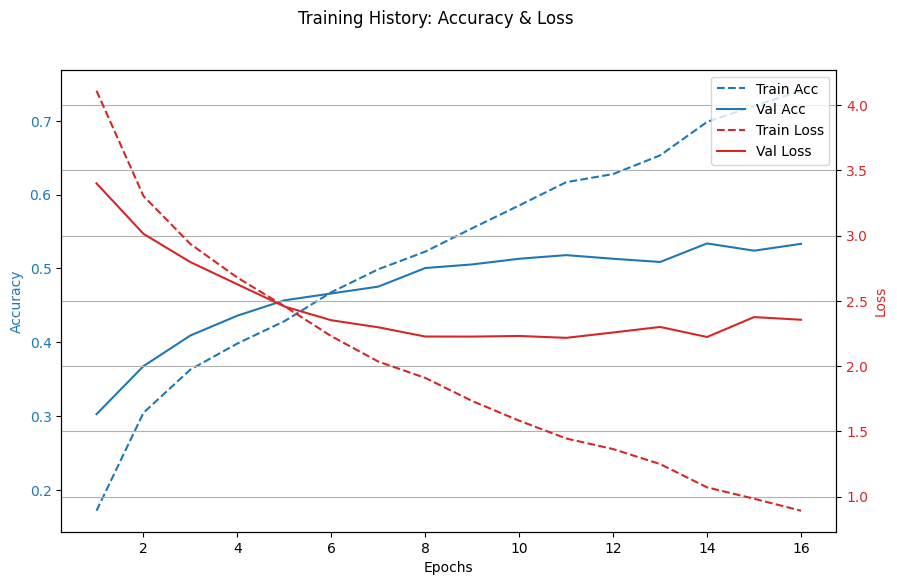

In [10]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
model2 = build_model2()
model2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss,
    metrics=metrics,
)
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
        keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ],
)

graph_history(history2)


* the gap is closer i guess...

Epoch 1/20


E0000 00:00:1756968561.760886   20267 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/dropout_6_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.1300 - loss: 4.2374 - val_accuracy: 0.2139 - val_loss: 3.6822 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.2582 - loss: 3.5027 - val_accuracy: 0.3206 - val_loss: 3.1799 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.3148 - loss: 3.1751 - val_accuracy: 0.3753 - val_loss: 2.8951 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.3572 - loss: 2.9614 - val_accuracy: 0.4212 - val_loss: 2.7087 - learning_rate: 0.0010
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.3712 - loss: 2.8271 - val_accuracy: 0.4278 - val_loss: 2.5254 - learning_rate: 0.0010
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.3938 - loss: 2.6691 - val_accuracy: 0.4497 - val_loss: 2.4170 - learning_rate: 0.0010
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4110 - loss: 2.5735 - val

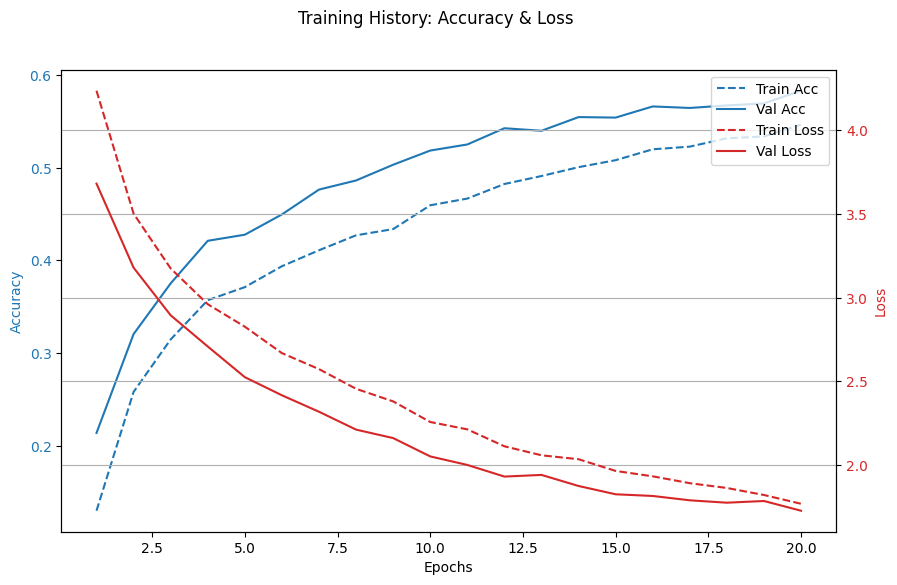

In [11]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

def build_model3(input_shape=img_size + (3,), num_classes=num_classes):
    
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    x = layers.Rescaling(1./255)(x)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Dropout(0.25)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    return model

model3 = build_model3()
model3.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
        keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ],
)

graph_history(history3)

* Improvement on overfitting for sure. I will continue to train this model to see what happens. I think I need more layers. 

In [12]:
model.save("my_model.keras")

Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5636 - loss: 1.7057
Epoch 1: val_loss improved from None to 1.77821, saving model to my_best_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5511 - loss: 1.7503 - val_accuracy: 0.5788 - val_loss: 1.7782 - learning_rate: 0.0010
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5688 - loss: 1.7202
Epoch 2: val_loss improved from 1.77821 to 1.72780, saving model to my_best_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5655 - loss: 1.7164 - val_accuracy: 0.5804 - val_loss: 1.7278 - learning_rate: 0.0010
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5766 - loss: 1.6302
Epoch 3: val_loss improved from 1.72780 to 1.70989, saving model to my_best_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5666 - loss: 1.6728 - val_accuracy: 0.5826 - val_loss: 1.7099 - learning_rate: 0.0010
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

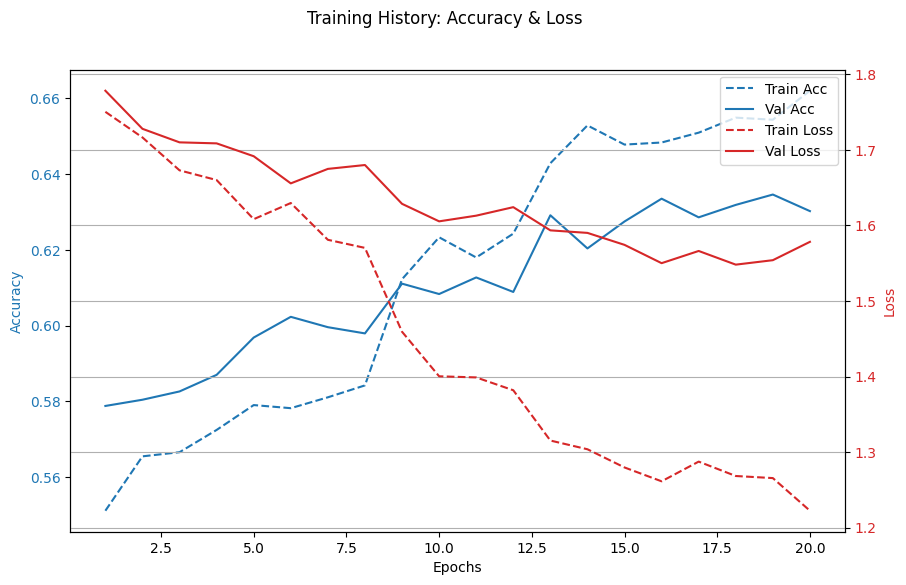

In [ ]:
history4 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=5, 
            restore_best_weights=True, 
            monitor="val_loss"
            ),
        keras.callbacks.ReduceLROnPlateau(
            patience=2, 
            factor=0.5, 
            monitor="val_loss"
            ),
        keras.callbacks.ModelCheckpoint(
            filepath=".gitignore/my_best_model.keras",  
            monitor="val_loss",           
            save_best_only=True,         
            mode="min",                  
            verbose=1
            ),
    ],
)

graph_history(history4)

* After 20 more epochs, the model improved about 12%. I can continue training with more epochs or add more hidden layers. The overfitting problem is not as bad anymore thanks to data augmentations. 